## Supply-Demand Gap Analysis - Uber

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [12]:
#Import Data
df=pd.read_csv('Uber Request Data.csv')

In [13]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


#### Description of Data

+ Request ID: A unique token representing a customer request.
+ Pickup point: Customer pickup point with two levels based on customer's location (City-represents customers to be picked up at the city and dropped to the airport; Airport-represents customers to be picked up from the airport and dropped to the city).
+ Driver ID: Unique identification number of a driver.
+ Status: It represents the customer request status and may take up one of three possible values; trip completed, cancelled or no cars available.
+ Request Timestamp: Contains date and time information at which the request was registered.
+ Drop Timestamp: Contains date and time information at which the trip was completed.

### Data Cleaning

In [14]:
#checking the dataset columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [15]:
#checking for missing values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [16]:
#check the status for which drop timestamp is missing
df[df['Drop timestamp'].isnull()]['Status']

2831            Cancelled
2832            Cancelled
2833            Cancelled
2834            Cancelled
2835            Cancelled
              ...        
6740    No Cars Available
6741    No Cars Available
6742    No Cars Available
6743    No Cars Available
6744    No Cars Available
Name: Status, Length: 3914, dtype: object

In [17]:
df[df['Drop timestamp'].isnull()]['Status'].value_counts()

Status
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [18]:
# Converting request and drop timestamp to datetime value from object datatype
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],dayfirst=True,format="mixed")
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True,format="mixed")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Request id,6745.0,NaN,NaN,NaN,3384.644922,1.0,1691.0,3387.0,5080.0,6766.0,1955.099667
Pickup point,6745,2,City,3507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver id,4095.0,NaN,NaN,NaN,149.501343,1.0,75.0,149.0,224.0,300.0,86.051994
Status,6745,3,Trip Completed,2831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Request timestamp,6745,NaN,NaN,NaN,2016-07-13 13:43:04.303039232,2016-07-11 00:00:00,2016-07-12 07:51:00,2016-07-13 14:23:37,2016-07-14 19:39:27,2016-07-15 23:59:58,NaN
Drop timestamp,2831,NaN,NaN,NaN,2016-07-13 13:15:33.899328768,2016-07-11 00:51:00,2016-07-12 07:42:00,2016-07-13 12:14:06,2016-07-14 19:13:52,2016-07-16 01:09:24,NaN


In [21]:
# Creating new columns for date, time and hour
df['Request Date'] = df['Request timestamp'].dt.date
df['Request Time'] = df['Request timestamp'].dt.time
df['Request Hour'] = df['Request timestamp'].dt.hour
day = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Request Day'] = df['Request timestamp'].dt.dayofweek.map(day)


In [22]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Request Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,Wednesday
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,Wednesday
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,Thursday
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,Friday
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,Friday
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,Monday


In [23]:
def get_time_slot(hour):
    if hour < 5:
        return 'Late Night'
    elif 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

In [24]:
df['Time_Slot'] = df['Request Hour'].apply(get_time_slot)

In [25]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Request Day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,Monday,Day
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,Tuesday,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,Wednesday,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,Wednesday,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,Thursday,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,Friday,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,Friday,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,Monday,Morning


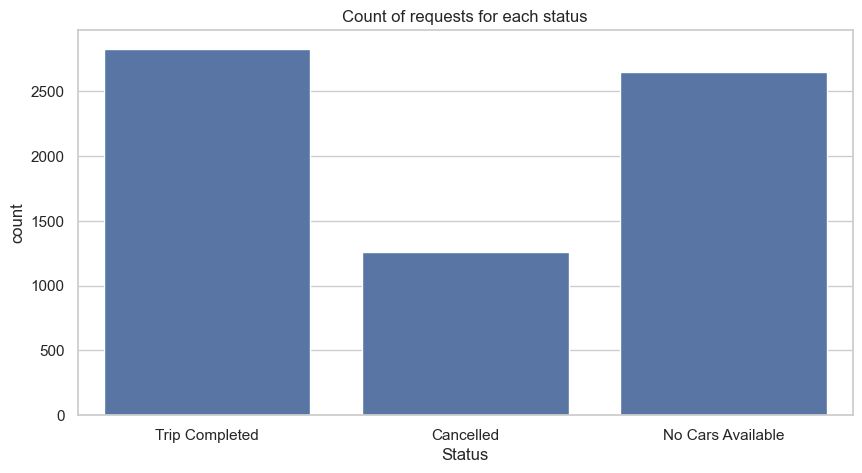

In [26]:
# Plotting the count of requests for each status
plt.figure(figsize=(10,5))
sns.countplot(x='Status',data=df)
plt.title('Count of requests for each status')
plt.show()


In [27]:
status_group = pd.DataFrame(df.groupby('Status').size()).reset_index().rename(columns={0:'Number of Requests'})
total_num_request = status_group['Number of Requests'].sum()
status_group['Percentage of total request'] = round((status_group['Number of Requests']/total_num_request)*100,2)

In [28]:
status_group

,Status,Number of Requests,Percentage of total request
0,Cancelled,1264,18.74
1,No Cars Available,2650,39.29
2,Trip Completed,2831,41.97


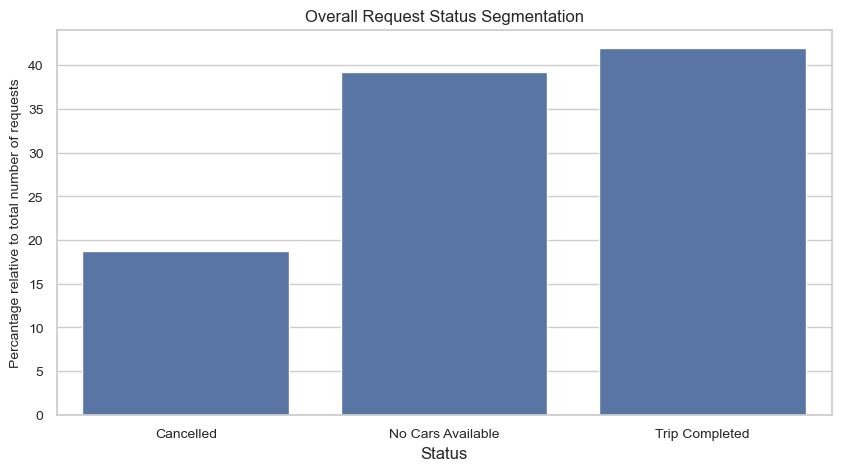

In [29]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=status_group, x='Status',y ='Percentage of total request')
ax.set_title('Overall Request Status Segmentation',fontsize=12)
ax.set_ylabel('Percantage relative to total number of requests',fontsize=10)
ax.tick_params(labelsize=10)
plt.show()

#### **No car available status us almost 40% of the total requests which is somewhere equal to the sum of the trips completed.**

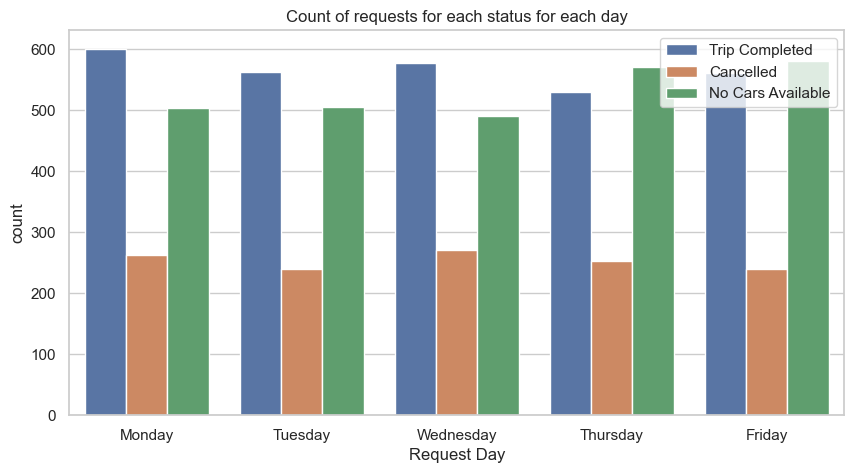

In [30]:
# Plotting the count of requests for each status for each day       
plt.figure(figsize=(10,5))
sns.countplot(x='Request Day',hue='Status',data=df)
plt.title('Count of requests for each status for each day')
plt.legend(loc='upper right')
plt.show()


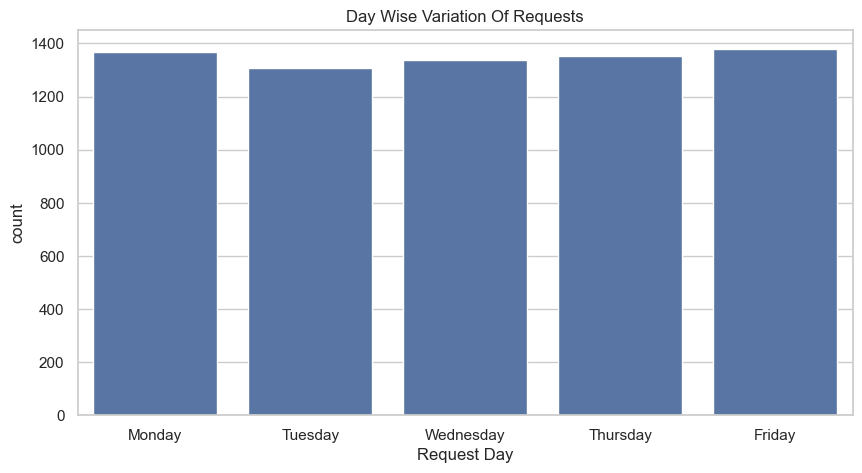

In [31]:
# Day Wise Variation  Of Requests
plt.figure(figsize=(10,5))  
sns.countplot(x='Request Day',data=df)
plt.title('Day Wise Variation Of Requests')
plt.show()

 **Very Minimal Variation in the number of requests**

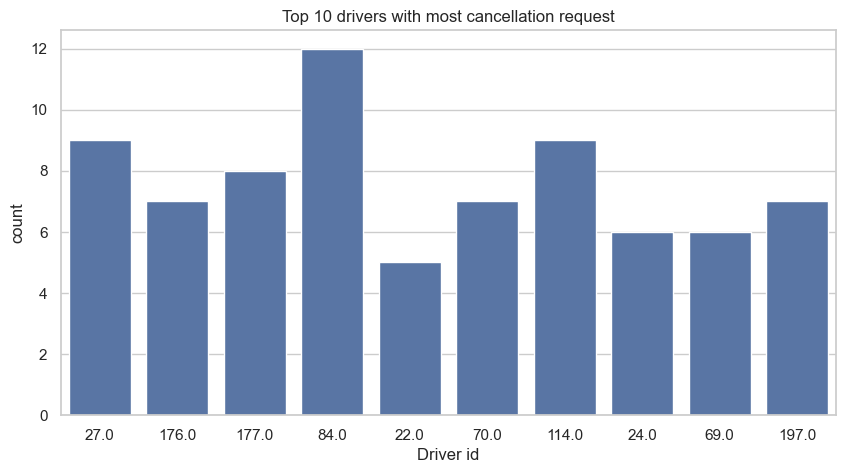

In [32]:
# check the top 10 drivers with most cancellation request
plt.figure(figsize=(10,5))
sns.countplot(x='Driver id',data=df[df['Status']=='Cancelled'],order=df['Driver id'].value_counts().head(10).index) 
plt.title('Top 10 drivers with most cancellation request')
plt.show()

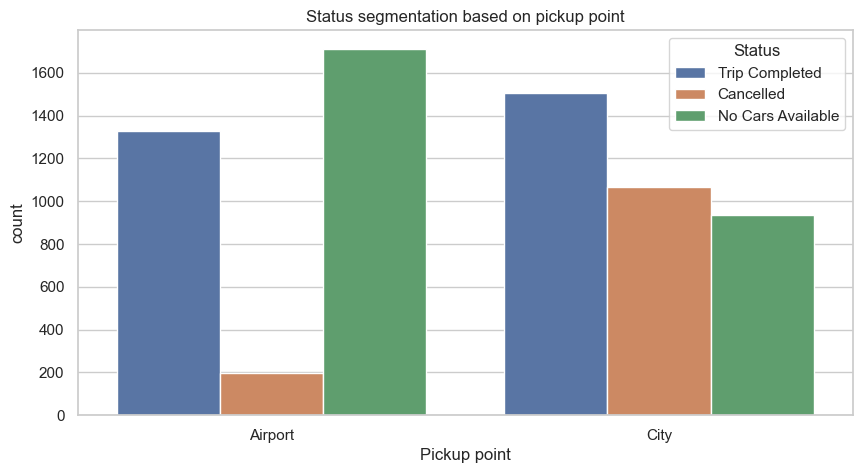

In [33]:
#status segmentation based on pickup point
plt.figure(figsize=(10,5))
sns.countplot(x='Pickup point',hue='Status',data=df)
plt.title('Status segmentation based on pickup point')
plt.show()


<Figure size 1000x500 with 0 Axes>

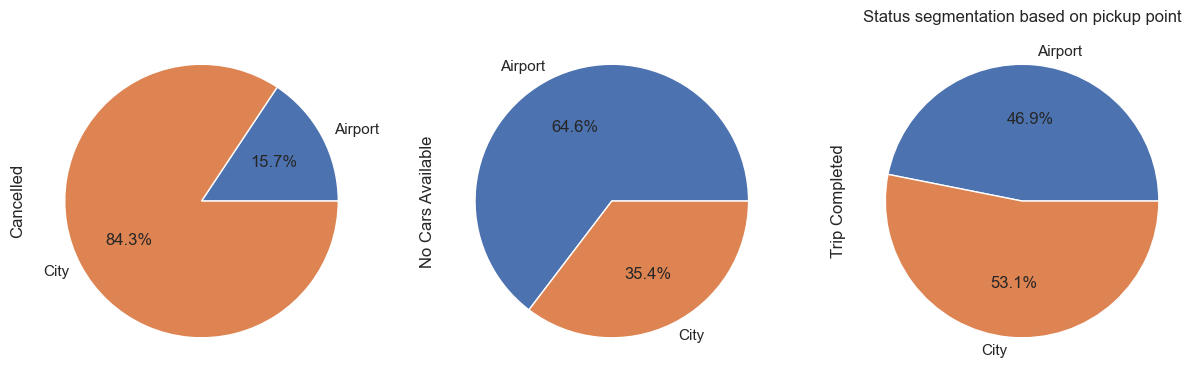

In [34]:
# piechart for status segmentation based on pickup point
plt.figure(figsize=(10,5))
df.groupby(['Pickup point','Status']).size().unstack().plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(15,10),legend=False)
plt.title('Status segmentation based on pickup point')
plt.show()

## Conclusions - of this segmentation
+ Most Cancellation request - City
+ Mostly No Cars Available - Airport
+ Most Trip Completed - City

#### **Customer Denial Rate with respect to Location**

In [35]:
#customer denial based on pickup point
customer_denied = df[df['Status'].isin(['Cancelled','No Cars Available'])]
customer_denied_on_pickup = customer_denied.groupby(['Pickup point']).size().reset_index().rename(columns={0:'Number of Requests Denied'})
customer_denied_on_pickup

,Pickup point,Number of Requests Denied
0,Airport,1911
1,City,2003


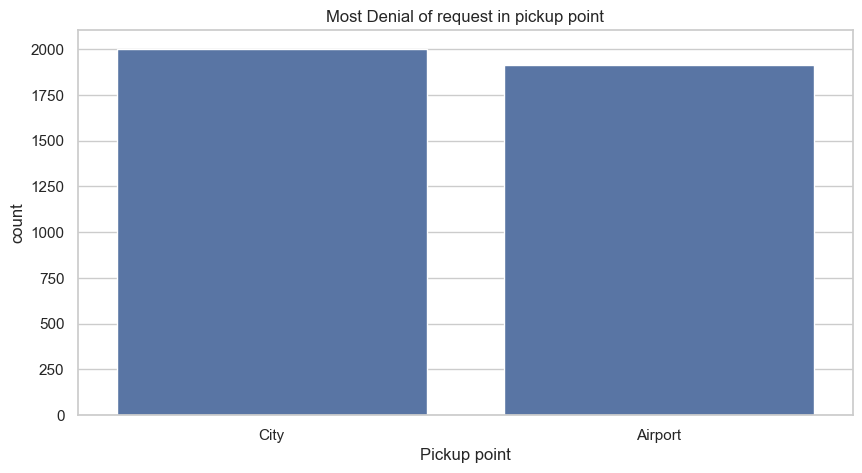

In [36]:
#Most Denial of request in pickup point
plt.figure(figsize=(10,5))
sns.countplot(x='Pickup point',data=customer_denied)
plt.title('Most Denial of request in pickup point')
plt.show()

In [37]:
# Status Segmentation based on time slots
status_by_time_slot = df.groupby(['Time_Slot','Status']).size().reset_index().rename(columns={0:'Number of Requests'})
status_by_time_slot = status_by_time_slot.sort_values(['Time_Slot','Number of Requests'],ascending=[True,False])
status_by_time_slot.head(10)

,Time_Slot,Status,Number of Requests
2,Day,Trip Completed,722
1,Day,No Cars Available,334
0,Day,Cancelled,168
4,Evening,No Cars Available,1392
5,Evening,Trip Completed,784
3,Evening,Cancelled,166
7,Late Night,No Cars Available,299
8,Late Night,Trip Completed,214
6,Late Night,Cancelled,65
11,Morning,Trip Completed,854


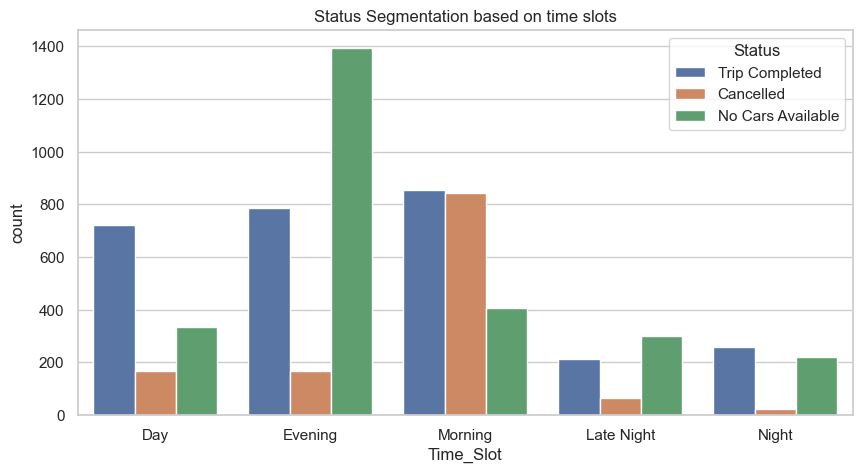

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='Time_Slot',hue='Status',data=df)
plt.title('Status Segmentation based on time slots')
plt.show()

### **Most Cancelation requests are high during Morning**
### **Max number od counr of No Cars Available are during Evening**

#### *Clearly the most Problematic Time Slot is Morning and Evening Time*

In [39]:
# status segmentation based on time slots with Location
city_pickup = df[df['Pickup point']=='City']
airport_pickup = df[df['Pickup point']=='Airport']


In [40]:
status_by_time_slot_city = city_pickup.groupby(['Time_Slot','Status']).size().reset_index().rename(columns={0:'Number of Requests'})
status_by_time_slot_city = status_by_time_slot_city.sort_values(['Time_Slot','Number of Requests'],ascending=[True,False])
status_by_time_slot_city.head(5)

,Time_Slot,Status,Number of Requests
2,Day,Trip Completed,395
1,Day,No Cars Available,247
0,Day,Cancelled,104
5,Evening,Trip Completed,411
4,Evening,No Cars Available,71


In [41]:
status_by_time_slot_airport = airport_pickup.groupby(['Time_Slot','Status']).size().reset_index().rename(columns={0:'Number of Requests'})
status_by_time_slot_airport = status_by_time_slot_airport.sort_values(['Time_Slot','Number of Requests'],ascending=[True,False])
status_by_time_slot_airport.head(5)

,Time_Slot,Status,Number of Requests
2,Day,Trip Completed,327
1,Day,No Cars Available,87
0,Day,Cancelled,64
4,Evening,No Cars Available,1321
5,Evening,Trip Completed,373


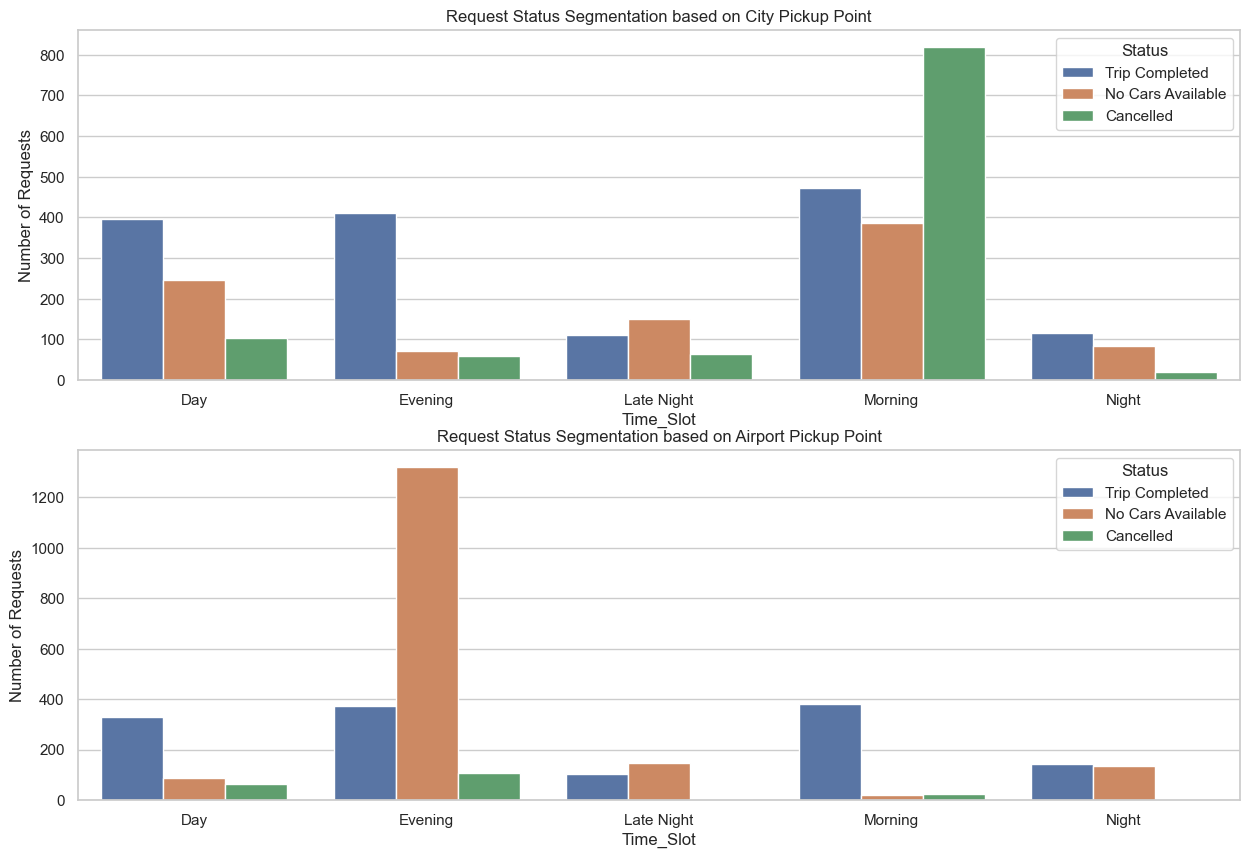

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
ax = sns.barplot(data=status_by_time_slot_city,x='Time_Slot',y='Number of Requests',hue='Status')
ax.set_title('Request Status Segmentation based on City Pickup Point')

plt.subplot(2, 1, 2)
ay = sns.barplot(data=status_by_time_slot_airport,x='Time_Slot',y='Number of Requests',hue='Status')
ay.set_title('Request Status Segmentation based on Airport Pickup Point')
plt.show()

In [43]:
hourly_status = df.groupby(['Request Hour','Status']).size().reset_index().rename(columns={0:'Number of Requests'}) 
hourly_status = hourly_status.sort_values(['Request Hour','Number of Requests'],ascending=[True,False])
hourly_status.head(10)

,Request Hour,Status,Number of Requests
1,0,No Cars Available,56
2,0,Trip Completed,40
0,0,Cancelled,3
4,1,No Cars Available,56
5,1,Trip Completed,25
3,1,Cancelled,4
7,2,No Cars Available,57
8,2,Trip Completed,37
6,2,Cancelled,5
10,3,No Cars Available,56


In [44]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Request Day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,Monday,Day
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,Tuesday,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,Wednesday,Morning


In [45]:
hourly_status_transpose = pd.pivot_table(data=hourly_status,columns='Status',values='Number of Requests',index='Request Hour')
hourly_status_transpose = hourly_status_transpose.reset_index().rename_axis(None,axis=1)
hourly_status_transpose['Demand'] = hourly_status_transpose.sum(axis=1)
hourly_status_transpose['Supply'] = hourly_status_transpose['Trip Completed']
hourly_status_transpose['Gap'] = hourly_status_transpose['Demand'] - hourly_status_transpose['Supply']
hourly_status_transpose.head()

,Request Hour,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,0,3.0,56.0,40.0,99.0,40.0,59.0
1,1,4.0,56.0,25.0,86.0,25.0,61.0
2,2,5.0,57.0,37.0,101.0,37.0,64.0
3,3,2.0,56.0,34.0,95.0,34.0,61.0
4,4,51.0,74.0,78.0,207.0,78.0,129.0


In [46]:
hourly_total_metric = pd.melt(hourly_status_transpose.loc[:,['Request Hour','Demand','Supply','Gap']], id_vars=['Request Hour'], var_name="Request Metric", value_name="Number of Requests").sort_values('Request Hour')
hourly_total_metric.head(10)

,Request Hour,Request Metric,Number of Requests
0,0,Demand,99.0
48,0,Gap,59.0
24,0,Supply,40.0
1,1,Demand,86.0
49,1,Gap,61.0
25,1,Supply,25.0
2,2,Demand,101.0
50,2,Gap,64.0
26,2,Supply,37.0
51,3,Gap,61.0


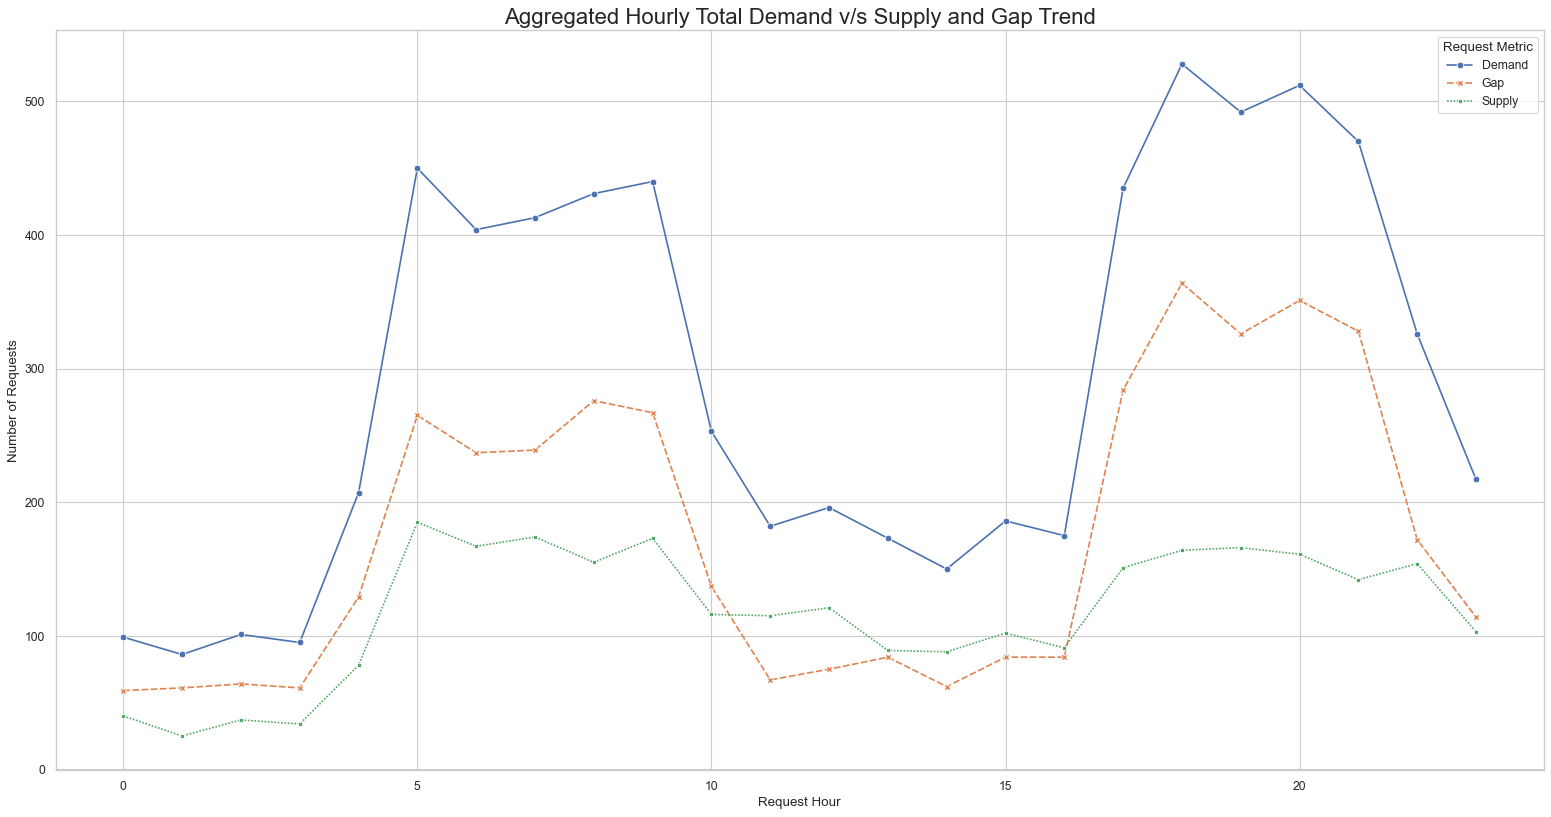

In [84]:
plt.figure(figsize=(24,12),dpi=80)
ax = sns.lineplot(data=hourly_total_metric,x='Request Hour',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Aggregated Hourly Total Demand v/s Supply and Gap Trend',fontsize=20)
plt.show()

#### 5AM to 10AM is the time in **Morning hour** when Highest gap is there and between 5pm to 9pm in **Eveening hour** when the gap is highest 

In [55]:
status_timeslot_transpose = pd.pivot_table(data= status_by_time_slot , columns='Status',values='Number of Requests',index='Time_Slot') 
status_timeslot_transpose = status_timeslot_transpose.reset_index().rename_axis(None,axis=1)   

status_timeslot_transpose['Demand']=status_timeslot_transpose.sum(axis=1,numeric_only=True)
status_timeslot_transpose['Supply']=status_timeslot_transpose['Trip Completed']
status_timeslot_transpose['Gap']=status_timeslot_transpose['Demand']-status_timeslot_transpose['Supply']
status_timeslot_transpose.head()


,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Day,168.0,334.0,722.0,1224.0,722.0,502.0
1,Evening,166.0,1392.0,784.0,2342.0,784.0,1558.0
2,Late Night,65.0,299.0,214.0,578.0,214.0,364.0
3,Morning,843.0,406.0,854.0,2103.0,854.0,1249.0
4,Night,22.0,219.0,257.0,498.0,257.0,241.0


In [56]:
status_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']]

,Time_Slot,Demand,Supply,Gap
0,Day,1224.0,722.0,502.0
1,Evening,2342.0,784.0,1558.0
2,Late Night,578.0,214.0,364.0
3,Morning,2103.0,854.0,1249.0
4,Night,498.0,257.0,241.0


In [58]:
timeslot_total_metric = pd.melt(status_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests").sort_values('Time_Slot')
timeslot_total_metric = timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
timeslot_total_metric.head(10)

,Time_Slot,Request Metric,Number of Requests
0,Day,Demand,1224.0
10,Day,Gap,502.0
5,Day,Supply,722.0
1,Evening,Demand,2342.0
11,Evening,Gap,1558.0
6,Evening,Supply,784.0
2,Late Night,Demand,578.0
12,Late Night,Gap,364.0
7,Late Night,Supply,214.0
3,Morning,Demand,2103.0


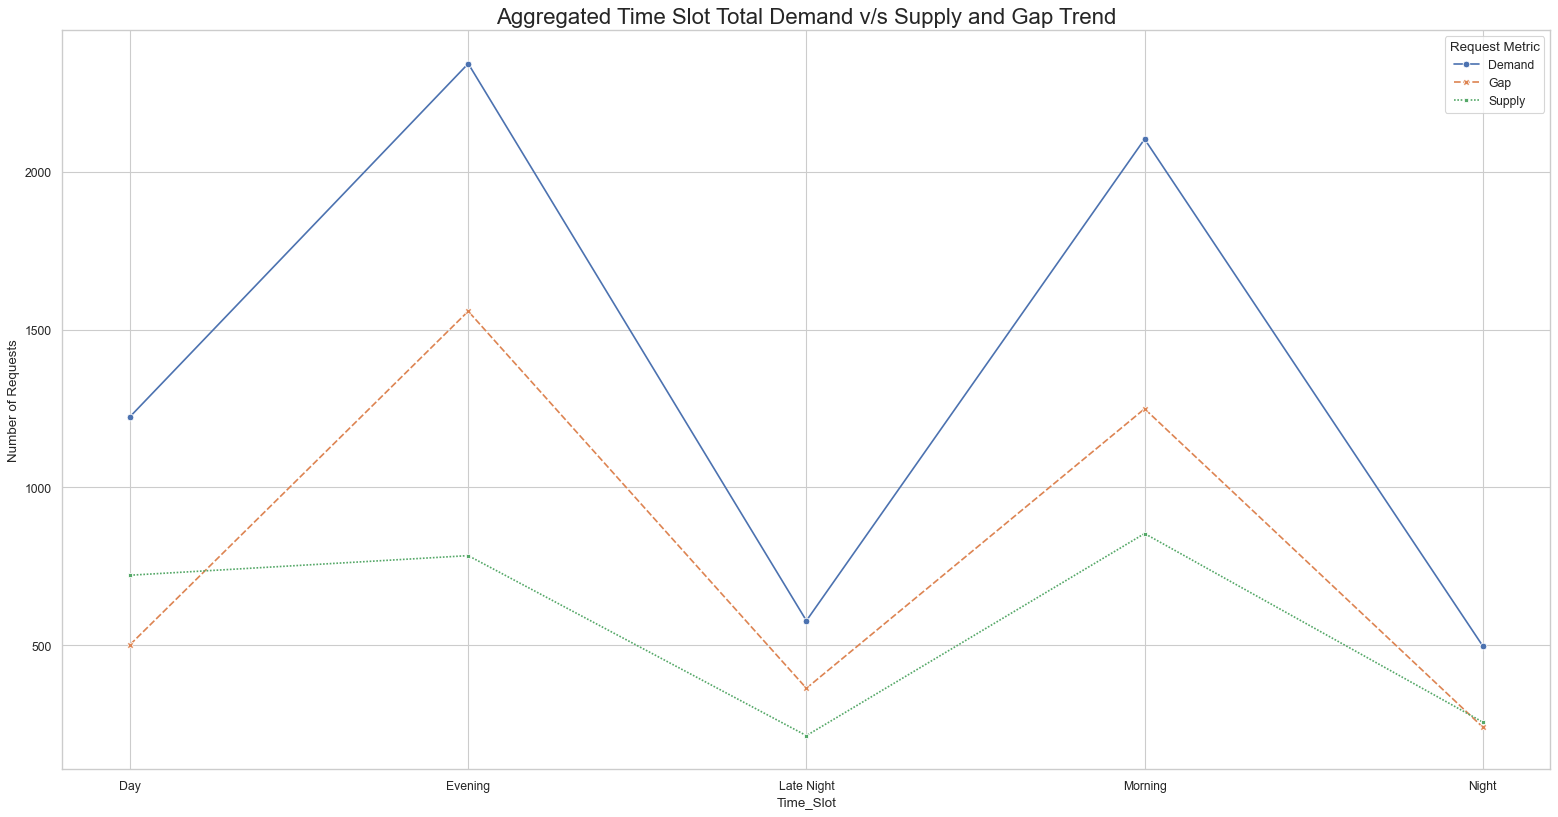

In [82]:
plt.figure(figsize=(24,12),dpi=80)
a = sns.lineplot(data=timeslot_total_metric,x='Time_Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
a.set_title('Aggregated Time Slot Total Demand v/s Supply and Gap Trend',fontsize=20)
plt.show()

In [60]:
city_timeslot_transpose = pd.pivot_table(data= status_by_time_slot_city , columns='Status',values='Number of Requests',index='Time_Slot')
city_timeslot_transpose = city_timeslot_transpose.reset_index().rename_axis(None,axis=1)
city_timeslot_transpose['Demand']=city_timeslot_transpose.sum(axis=1,numeric_only=True) 
city_timeslot_transpose['Supply']=city_timeslot_transpose['Trip Completed']
city_timeslot_transpose['Gap']=city_timeslot_transpose['Demand']-city_timeslot_transpose['Supply']
city_timeslot_transpose.head()

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Day,104.0,247.0,395.0,746.0,395.0,351.0
1,Evening,60.0,71.0,411.0,542.0,411.0,131.0
2,Late Night,63.0,151.0,111.0,325.0,111.0,214.0
3,Morning,820.0,385.0,472.0,1677.0,472.0,1205.0
4,Night,19.0,83.0,115.0,217.0,115.0,102.0


In [62]:
city_timeslot_total_metric = pd.melt(city_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
city_timeslot_total_metric = city_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
city_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,Day,Demand,746.0
10,Day,Gap,351.0
5,Day,Supply,395.0
1,Evening,Demand,542.0
11,Evening,Gap,131.0


In [63]:
airport_timeslot_transpose = pd.pivot_table(data=status_by_time_slot_airport,columns='Status',values='Number of Requests',index='Time_Slot')
airport_timeslot_transpose = airport_timeslot_transpose.reset_index().rename_axis(None,axis=1)
airport_timeslot_transpose['Demand'] = airport_timeslot_transpose.sum(axis=1, numeric_only=True)
airport_timeslot_transpose['Supply'] = airport_timeslot_transpose['Trip Completed']
airport_timeslot_transpose['Gap'] = airport_timeslot_transpose['Demand'] - airport_timeslot_transpose['Supply']

In [64]:
airport_timeslot_transpose

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Day,64.0,87.0,327.0,478.0,327.0,151.0
1,Evening,106.0,1321.0,373.0,1800.0,373.0,1427.0
2,Late Night,2.0,148.0,103.0,253.0,103.0,150.0
3,Morning,23.0,21.0,382.0,426.0,382.0,44.0
4,Night,3.0,136.0,142.0,281.0,142.0,139.0


In [65]:
city_timeslot_total_metric = pd.melt(city_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
city_timeslot_total_metric = city_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
city_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,Day,Demand,746.0
10,Day,Gap,351.0
5,Day,Supply,395.0
1,Evening,Demand,542.0
11,Evening,Gap,131.0


In [67]:
airport_timeslot_transpose = pd.pivot_table(data=status_by_time_slot_airport,columns='Status',values='Number of Requests',index='Time_Slot')
airport_timeslot_transpose = airport_timeslot_transpose.reset_index().rename_axis(None,axis=1)
airport_timeslot_transpose['Demand'] = airport_timeslot_transpose.sum(axis=1, numeric_only=True)
airport_timeslot_transpose['Supply'] = airport_timeslot_transpose['Trip Completed']
airport_timeslot_transpose['Gap'] = airport_timeslot_transpose['Demand'] - airport_timeslot_transpose['Supply']
airport_timeslot_transpose

,Time_Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Day,64.0,87.0,327.0,478.0,327.0,151.0
1,Evening,106.0,1321.0,373.0,1800.0,373.0,1427.0
2,Late Night,2.0,148.0,103.0,253.0,103.0,150.0
3,Morning,23.0,21.0,382.0,426.0,382.0,44.0
4,Night,3.0,136.0,142.0,281.0,142.0,139.0


In [68]:
airport_timeslot_total_metric = pd.melt(airport_timeslot_transpose.loc[:,['Time_Slot','Demand','Supply','Gap']], id_vars=['Time_Slot'], var_name="Request Metric", value_name="Number of Requests")
airport_timeslot_total_metric = airport_timeslot_total_metric.sort_values(['Time_Slot','Request Metric'])
airport_timeslot_total_metric.head()

,Time_Slot,Request Metric,Number of Requests
0,Day,Demand,478.0
10,Day,Gap,151.0
5,Day,Supply,327.0
1,Evening,Demand,1800.0
11,Evening,Gap,1427.0


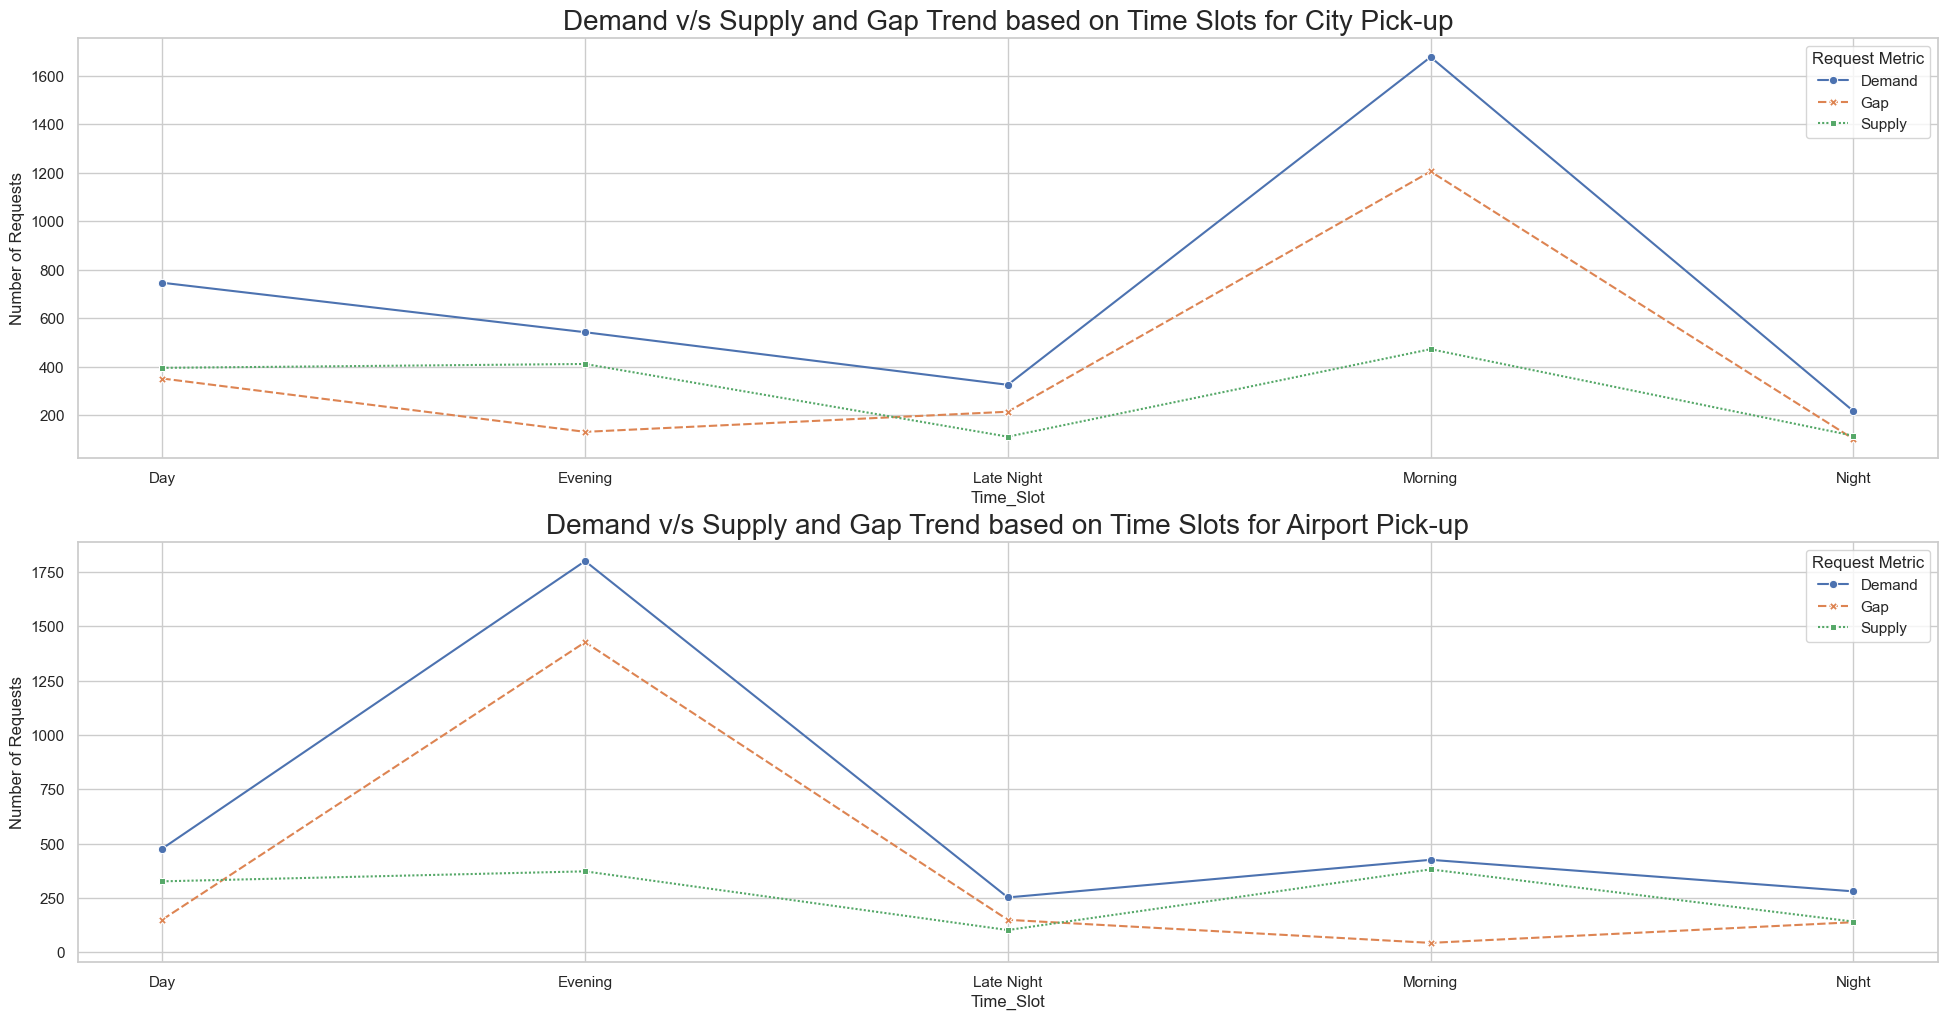

In [81]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 1, 1)
ax = sns.lineplot(data=city_timeslot_total_metric,x='Time_Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Demand v/s Supply and Gap Trend based on Time Slots for City Pick-up' ,fontsize=20)

plt.subplot(2, 1, 2)
ay = sns.lineplot(data=airport_timeslot_total_metric,x='Time_Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ay.set_title('Demand v/s Supply and Gap Trend based on Time Slots for Airport Pick-up',fontsize=20)
plt.show()

## Conclusion
**The analysis reveals significant supply-demand gaps during peak hours, with the highest issues observed in the morning and evening. Addressing these gaps could involve increasing driver availability during these times or offering incentives for drivers to work during peak demand periods. Further exploration and targeted strategies could help in balancing the supply-demand equilibrium more effectively.**